In [1]:
import os, shutil

In [2]:
original_dataset_dir = '/home/leafmonk/Documents/Cash Crop POC/images'

In [3]:
base_dir = '/home/leafmonk/Documents/Cash Crop POC/POC'
os.mkdir(base_dir)

In [4]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [5]:
train_hydrangea_dir = os.path.join(train_dir, 'hydrangea')
os.mkdir(train_hydrangea_dir)

In [6]:
train_elephant_dir = os.path.join(train_dir, 'elephant')
os.mkdir(train_elephant_dir)

In [7]:
validation_hydrangea_dir = os.path.join(validation_dir, 'hydrangea')
os.mkdir(validation_hydrangea_dir)

In [8]:
validation_elephant_dir = os.path.join(validation_dir, 'elephant')
os.mkdir(validation_elephant_dir)

In [9]:
test_hydrangea_dir = os.path.join(test_dir, 'hydrangea')
os.mkdir(test_hydrangea_dir)

In [10]:
test_elephant_dir = os.path.join(test_dir, 'elephant')
os.mkdir(test_elephant_dir)

In [11]:
inames = ['Hydrangeaimage-{}.jpg'.format(i) for i in range(900)]
fnames = ['hydrangea.{}.jpg'.format(i) for i in range(900)]

for i in range(len(fnames)):
    src = os.path.join(original_dataset_dir, 'Hydrangea',inames[i])
    dst = os.path.join(train_hydrangea_dir, fnames[i])
    shutil.copyfile(src, dst)

In [12]:
inames = ['Hydrangeaimage-{}.jpg'.format(i) for i in range(900,1280)]
fnames = ['hydrangea.{}.jpg'.format(i) for i in range(900,1280)]

for i in range(len(fnames)):
    src = os.path.join(original_dataset_dir, 'Hydrangea',inames[i])
    dst = os.path.join(validation_hydrangea_dir, fnames[i])
    shutil.copyfile(src, dst)

In [13]:
inames = ['Hydrangeaimage-{}.jpg'.format(i) for i in range(1280,1660)]
fnames = ['hydrangea.{}.jpg'.format(i) for i in range(1280,1660)]

for i in range(len(fnames)):
    src = os.path.join(original_dataset_dir, 'Hydrangea',inames[i])
    dst = os.path.join(test_hydrangea_dir, fnames[i])
    shutil.copyfile(src, dst)

In [14]:
inames = ['Elephant Earimage-{}.jpg'.format(i) for i in range(900)]
fnames = ['elephant.{}.jpg'.format(i) for i in range(900)]

for i in range(len(fnames)):
    src = os.path.join(original_dataset_dir, 'Elephant Ear',inames[i])
    dst = os.path.join(train_elephant_dir, fnames[i])
    shutil.copyfile(src, dst)

In [15]:
inames = ['Elephant Earimage-{}.jpg'.format(i) for i in range(900,1280)]
fnames = ['elephant.{}.jpg'.format(i) for i in range(900,1280)]

for i in range(len(fnames)):
    src = os.path.join(original_dataset_dir, 'Elephant Ear',inames[i])
    dst = os.path.join(validation_elephant_dir, fnames[i])
    shutil.copyfile(src, dst)

In [16]:
inames = ['Elephant Earimage-{}.jpg'.format(i) for i in range(1280,1660)]
fnames = ['elephant.{}.jpg'.format(i) for i in range(1280,1660)]

for i in range(len(fnames)):
    src = os.path.join(original_dataset_dir, 'Elephant Ear',inames[i])
    dst = os.path.join(test_elephant_dir, fnames[i])
    shutil.copyfile(src, dst)

In [17]:
print('total training hydrangea images:', len(os.listdir(train_hydrangea_dir)))
print('total validation hydrangea images:', len(os.listdir(validation_hydrangea_dir)))
print('total test hydrangea images:', len(os.listdir(test_hydrangea_dir)))
print('total training elephant images:', len(os.listdir(train_elephant_dir)))
print('total validation elephant images:', len(os.listdir(validation_elephant_dir)))
print('total test elephant images:', len(os.listdir(test_elephant_dir)))

total training hydrangea images: 900
total validation hydrangea images: 380
total test hydrangea images: 380
total training elephant images: 900
total validation elephant images: 380
total test elephant images: 380


In [18]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [19]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(loss='binary_crossentropy',
        optimizer=optimizers.RMSprop(lr=1e-4),
        metrics=['acc'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [21]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)

In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 1800 images belonging to 2 classes.


In [24]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 760 images belonging to 2 classes.


In [25]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=18,
        epochs=160,
        validation_data=validation_generator,
        validation_steps=18)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 18 steps, validate for 18 steps
Epoch 1/160
18/18 [==============================] - 5s 258ms/step - loss: 0.6988 - acc: 0.5191 - val_loss: 0.6800 - val_acc: 0.4965
Epoch 2/160
18/18 [==============================] - 4s 234ms/step - loss: 0.6877 - acc: 0.5920 - val_loss: 0.6608 - val_acc: 0.6979
Epoch 3/160
18/18 [==============================] - 4s 229ms/step - loss: 0.6704 - acc: 0.6215 - val_loss: 0.6301 - val_acc: 0.6094
Epoch 4/160
18/18 [==============================] - 4s 227ms/step - loss: 0.6481 - acc: 0.6233 - val_loss: 0.6753 - val_acc: 0.5920
Epoch 5/160
18/18 [==============================] - 4s 216ms/step - loss: 0.6390 - acc: 0.6467 - val_loss: 0.6017 - val_acc: 0.6806
Epoch 6/160
18/18 [==============================] - 4s 227ms/step - loss: 0.6499 - acc: 0.6163 - val_loss: 0.6292 - val_acc: 0.6493
Epoch 7/160
18/18 [===============

Epoch 59/160
18/18 [==============================] - 4s 227ms/step - loss: 0.4658 - acc: 0.7743 - val_loss: 0.4485 - val_acc: 0.7882
Epoch 60/160
18/18 [==============================] - 4s 216ms/step - loss: 0.4897 - acc: 0.7482 - val_loss: 0.5232 - val_acc: 0.7691
Epoch 61/160
18/18 [==============================] - 4s 230ms/step - loss: 0.4952 - acc: 0.7500 - val_loss: 0.5475 - val_acc: 0.7535
Epoch 62/160
18/18 [==============================] - 4s 225ms/step - loss: 0.4958 - acc: 0.7409 - val_loss: 0.5513 - val_acc: 0.7552
Epoch 63/160
18/18 [==============================] - 4s 216ms/step - loss: 0.4998 - acc: 0.7428 - val_loss: 0.4759 - val_acc: 0.7778
Epoch 64/160
18/18 [==============================] - 4s 229ms/step - loss: 0.5051 - acc: 0.7431 - val_loss: 0.4576 - val_acc: 0.7865
Epoch 65/160
18/18 [==============================] - 4s 218ms/step - loss: 0.4925 - acc: 0.7536 - val_loss: 0.6399 - val_acc: 0.7188
Epoch 66/160
18/18 [==============================] - 4s 225ms

Epoch 120/160
18/18 [==============================] - 4s 237ms/step - loss: 0.4268 - acc: 0.7882 - val_loss: 0.4791 - val_acc: 0.7951
Epoch 121/160
18/18 [==============================] - 4s 231ms/step - loss: 0.4019 - acc: 0.8038 - val_loss: 0.4777 - val_acc: 0.7969
Epoch 122/160
18/18 [==============================] - 4s 230ms/step - loss: 0.4623 - acc: 0.7663 - val_loss: 0.5774 - val_acc: 0.7604
Epoch 123/160
18/18 [==============================] - 4s 226ms/step - loss: 0.4151 - acc: 0.7969 - val_loss: 0.5270 - val_acc: 0.7674
Epoch 124/160
18/18 [==============================] - 4s 230ms/step - loss: 0.4068 - acc: 0.8021 - val_loss: 0.4579 - val_acc: 0.8073
Epoch 125/160
18/18 [==============================] - 4s 235ms/step - loss: 0.4151 - acc: 0.8090 - val_loss: 0.5369 - val_acc: 0.7812
Epoch 126/160
18/18 [==============================] - 4s 223ms/step - loss: 0.4282 - acc: 0.7971 - val_loss: 0.5617 - val_acc: 0.7708
Epoch 127/160
18/18 [==============================] - 

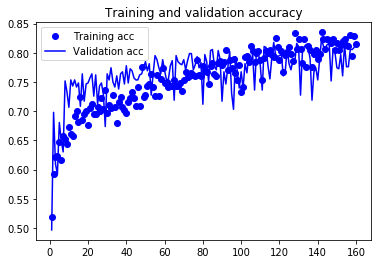

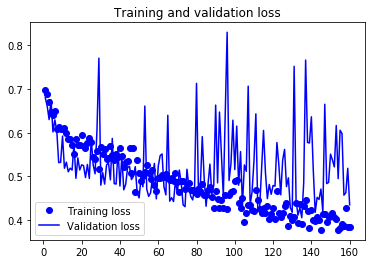

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

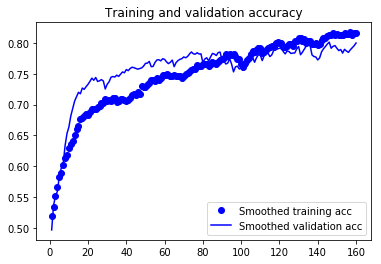

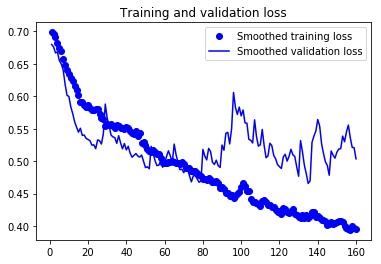

In [30]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs,
        smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
        smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
        smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
        smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=18,
        class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 760 images belonging to 2 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
test acc: 0.8144737


In [ ]:
model.save('cash_crop_4C_2D_4.h5')